In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# leap frog N body algorithm

def leapfrogN(M, X0, V0, Nt, dt, acc):
    """M: array with mass values; X0 & V0: N*3 arrays with initial
    conditions of positions and velocities; Nt: number of time steps; dt: 
    time step size; acc: function that evaluates and gives back N*3 array
    with accelerations for given positions and masses"""
    N = np.shape(M)[0]
    t = np.arange(0,dt*Nt,dt)
    X = np.zeros((N,3,Nt))
    V = np.zeros((N,3,Nt))
    
    X[:,:,0] = X0
    V[:,:,0] = V0
    
    for i in range(Nt-1):
        vhalf = V[:,:,i] + acc(M,X[:,:,i])*dt/2
        X[:,:,i+1] = X[:,:,i] + vhalf*dt
        V[:,:,i+1] = vhalf + acc(M,X[:,:,i+1])*dt/2
    
    return t, X, V
    
    

In [3]:
# RHS of dv/dt aka acceleration
def newton_acc(M,X):
    
    N = np.shape(M)[0]
    A = np.zeros((N,3))
    
    for i in range(N):
        for j in range(N):
            if i==j:
                continue
            A[i,:] += M[j]*(X[j,:] - X[i,:])/(np.linalg.norm(X[j,:] - X[i,:]))**3
    
    return A

X0 = [[-0.5  0.   0. ]
 [ 0.5  0.   0. ]]
V0 = [[ 0.  -0.5  0. ]
 [ 0.   0.5  0. ]]


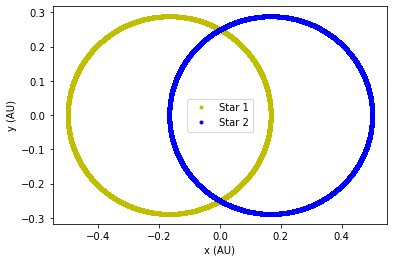

In [4]:
# 2.2: binary star problem
N = 2
M = np.array((1,1))
X0 = np.zeros((N,3))
X0[0,0] = -0.5
X0[1,0] = 0.5
V0 = np.zeros((N,3))
V0[0,1]  = -0.5
V0[1,1] = 0.5

print(f'X0 = {X0}')
print(f'V0 = {V0}')


dt = 1e-4
T = 10
Nt = int(T/dt)

t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)

fig = plt.figure()
plt.plot(X[0,0,:],X[0,1,:], 'y.', X[1,0,:],X[1,1,:],'b.')
plt.legend(['Star 1','Star 2'])
plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.show()

X0 = [[-0.5  0.   0. ]
 [ 0.5  0.   0. ]
 [ 1.   6.   2. ]]
V0 = [[ 0.  -0.5  0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0. ]]


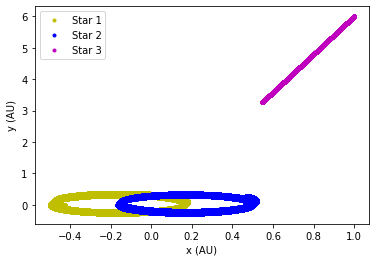

In [5]:
# 2.3: + third star:
N = 3
M = np.array((1,1,0.1))
X0 = np.zeros((N,3))
X0[0,0] = -0.5
X0[1,0] = 0.5
X0[2,:] = np.array((1,6,2))
V0 = np.zeros((N,3))
V0[0,1]  = -0.5
V0[1,1] = 0.5

print(f'X0 = {X0}')
print(f'V0 = {V0}')

dt = 1e-4
T = 10
Nt = int(T/dt)

t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)

fig = plt.figure()
plt.plot(X[0,0,:],X[0,1,:], 'y.', X[1,0,:],X[1,1,:],'b.', X[2,0,:],X[2,1,:],'m.')
plt.legend(['Star 1','Star 2', 'Star 3'], loc='upper left')
plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.show()

X0 = [[-0.5  0.   0. ]
 [ 0.5  0.   0. ]
 [ 1.   6.   3. ]]
V0 = [[ 0.  -0.5  0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0. ]]


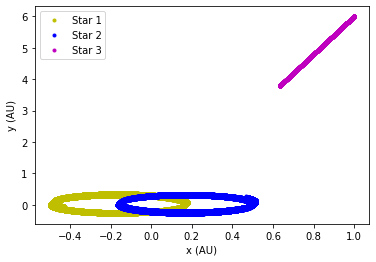

In [10]:
# altered x3
N = 3
M = np.array((1,1,0.1))
X0 = np.zeros((N,3))
X0[0,0] = -0.5
X0[1,0] = 0.5
X0[2,:] = np.array((1,6,3))
V0 = np.zeros((N,3))
V0[0,1]  = -0.5
V0[1,1] = 0.5

print(f'X0 = {X0}')
print(f'V0 = {V0}')

dt = 1e-3
T = 10
Nt = int(T/dt)

t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)

fig = plt.figure()
plt.plot(X[0,0,:],X[0,1,:], 'y.', X[1,0,:],X[1,1,:],'b.', X[2,0,:],X[2,1,:],'m.')
plt.legend(['Star 1','Star 2', 'Star 3'], loc='upper left')
plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.show()